In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('AB_NYC_2019.csv')

FileNotFoundError: ignored

In [ ]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
# Formats axis labels and plot titles
def axis_formatter(xlabel = None, ylabel = None, grTitle = None):
    return ax.tick_params(axis = 'x', labelsize = 9),  ax.tick_params(axis = 'y',\
    labelsize = 9), plt.xlabel(xlabel, fontsize = 11), plt.ylabel(ylabel, fontsize = 11),\
     plt.title(grTitle, fontsize = 13)

### Question 1: How are the property listings distributed over the neighbourhoods?

In [ ]:
n_per_neighbourhood = df.groupby('neighbourhood_group').size().reset_index(name = 'number of properties')
n_per_neighbourhood

,neighbourhood_group,number of properties
0,Bronx,1091
1,Brooklyn,20104
2,Manhattan,21661
3,Queens,5666
4,Staten Island,373


In [ ]:
sns.set(style="whitegrid")

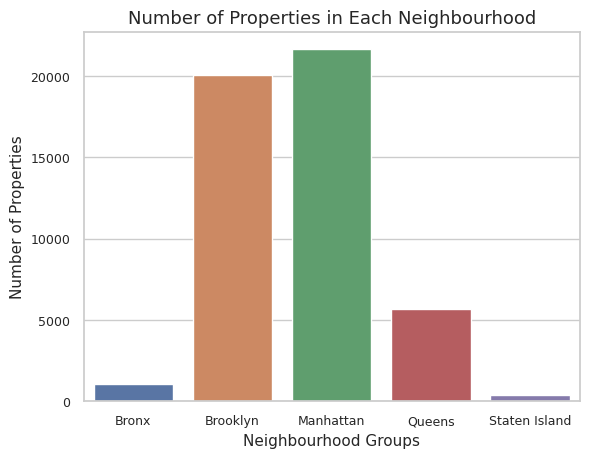

In [ ]:
ax = sns.barplot(x = 'neighbourhood_group', y = 'number of properties', data = n_per_neighbourhood)
axis_formatter('Neighbourhood Groups', 'Number of Properties', 'Number of Properties in Each Neighbourhood');

**Inference:** The bar plot illustrates the number of property listings in 5 different neighbourhood groups. The *x*-axis represents the neighbourhood groups, while the *y*-axis represents the number of properties in each neighbourhood group. It can be inferred that the majority of the properties are situated in Brooklyn and Manhattan, with around 20,000 and 21,500, respectively. Slightly over 5000 properties are situated in Queens, while a small portion of the properties are in Bronx and Staten Island, numbers estimated to be roughly 1000 and 400 respectively.


### Question 2: How is customer preference related to locations?

In [ ]:
reviews_data = df.groupby('neighbourhood_group')['number_of_reviews'].mean().reset_index(name = 'average_number_of_reviews')
reviews_data

,neighbourhood_group,average_number_of_reviews
0,Bronx,26.004583
1,Brooklyn,24.202845
2,Manhattan,20.985596
3,Queens,27.700318
4,Staten Island,30.941019


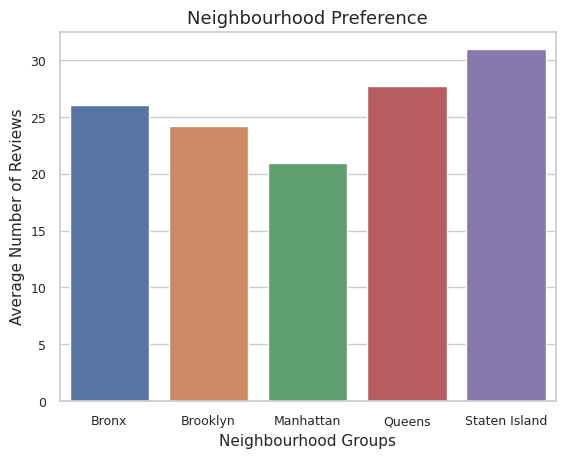

In [ ]:
ax = sns.barplot(x = 'neighbourhood_group', y = 'average_number_of_reviews', data = reviews_data)
axis_formatter('Neighbourhood Groups', 'Average Number of Reviews', 'Neighbourhood Preference');

**Inference:** The bar plot illustrates which neighbourhood groups are preferred based on the number of reviews in each neighbourhood group. We leverage the number of reviews as a representative measure for customer preference. A higher number of reviews often indicates greater customer engagement and interest in a property.  The *x*-axis on the plot represents the neighbourhood groups, while the *y*-axis represents the average number of reviews on properties indiscriminate of their type. Despite the significantly lower number of properties in Staten Island and Bronx, customers tend to prefer properties located in those locations, with an average of 31 and 26 reviews. respectively. Queens and Brooklyn receive a fair number of bookings, with an average of 28 and 24, respectively. Finally, despite the majority of properties being located in Manhattan, a relatively lower number of reviews, approximately 20, were observed.

Using mean as inference point: Customer preference for an average house in a neighbourhood. Using sum is not reliable as there is a skew in the number of properties in each neighbourhood group. Customer preference for a neighbourhood group.

### Question 3: How are the listings distributed over different types of properties?
* Types of properties and their

In [ ]:
prop_type = df.groupby('room_type').size().reset_index(name = 'total_properties')
prop_type

,room_type,total_properties
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


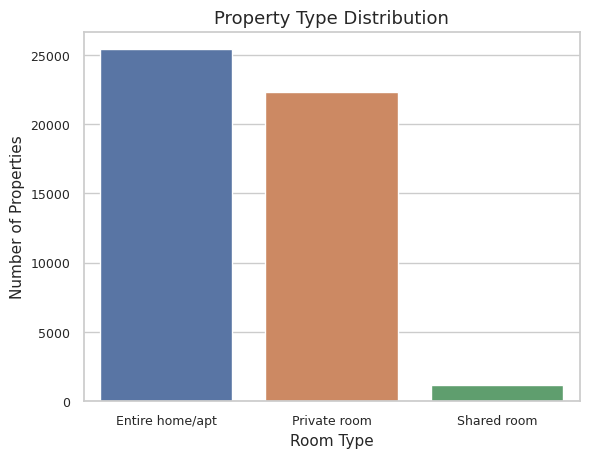

In [ ]:
ax = sns.barplot(x = 'room_type', y = 'total_properties', data = prop_type)
axis_formatter('Room Type', 'Number of Properties', 'Property Type Distribution');

**Inference:** The bar plot depicts the number of properties of three different types of properties, namely, Entire home/apt, Private Rooms, and Shared Rooms. It can be observed that majority of the properties are of the type 'Entire home/apt' or 'Private room', recording slightly over 25000 and significanly small number of properites are of type 'Shared room' with a number around 1000.

Majority is entire home or private room and shared room has a very small number.

### Question 4: What type of properties are preferred by customers?

In [ ]:
pref_data = df.groupby('room_type')['number_of_reviews'].mean().reset_index(name = 'average_reviews')

pref_data

,room_type,average_reviews
0,Entire home/apt,22.842418
1,Private room,24.112962
2,Shared room,16.600000


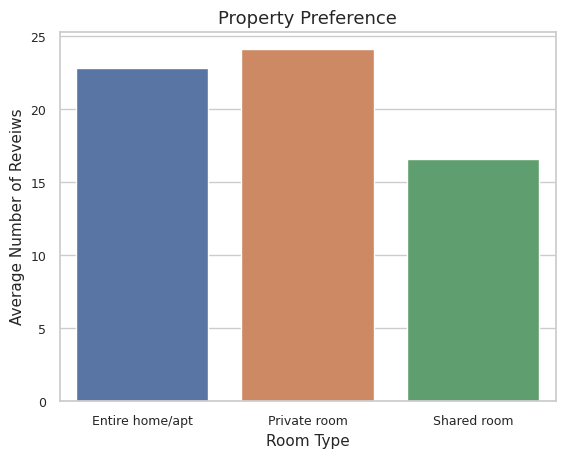

In [ ]:
ax = sns.barplot(x = 'room_type', y = 'average_reviews', data = pref_data)
axis_formatter('Room Type', 'Average Number of Reveiws', 'Property Preference');

**Inference:** The plot shows the type of properties preferred by customers. The *x*-axis represents the types of properties, while the *y*-axis represents the average number of reviews for each properity type. It can be seen that more customers prefer Private rooms, having around 25 reviews on average. Entire home/apt bookings follow with a bit over 20 reviews and finally Shared rooms with relatively lower reviews around 16 reviews.

### Question 5: How is the preference for a specific type of property distributed over different neighbourhood groups?

In [ ]:
data = pd.melt(pd.DataFrame(df), id_vars='neighbourhood_group', var_name='room_type', value_name='review_count')
data

,neighbourhood_group,room_type,review_count
0,Brooklyn,id,2539
1,Manhattan,id,2595
2,Manhattan,id,3647
3,Brooklyn,id,3831
4,Manhattan,id,5022
...,...,...,...
733420,Brooklyn,availability_365,9
733421,Brooklyn,availability_365,36
733422,Manhattan,availability_365,27
733423,Manhattan,availability_365,2


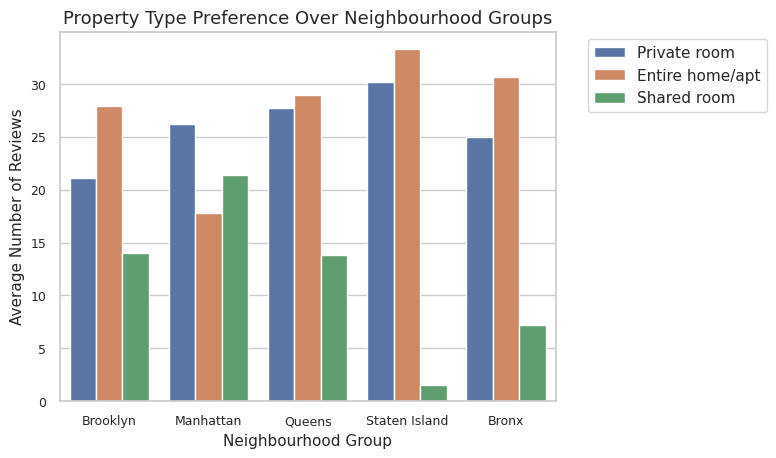

In [ ]:
ax = sns.barplot(x='neighbourhood_group', y='number_of_reviews', hue='room_type', data=df, errorbar = None)
axis_formatter('Neighbourhood Group', 'Average Number of Reviews', 'Property Type Preference Over Neighbourhood Groups');


# Move the legend outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

**Inference:** The bar plot illustrates the property type preference over the five neighbourhood groups. It can be seen that there is a similar trend over properties found in Brooklyn, Queens, Staten Island, and Bronx, where more properties of type Entire home/apt are preferred than Private and Shared rooms. However, for properties located in Manhattan, Private rooms are preferred more than Entire home/apt and Shared rooms.

### Question 6: How is the cost distributed over the neighbourhoods?

In [ ]:
cost_prop_data = df.groupby('neighbourhood_group')['price'].mean().reset_index(name = 'average_price')

cost_prop_data

,neighbourhood_group,average_price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


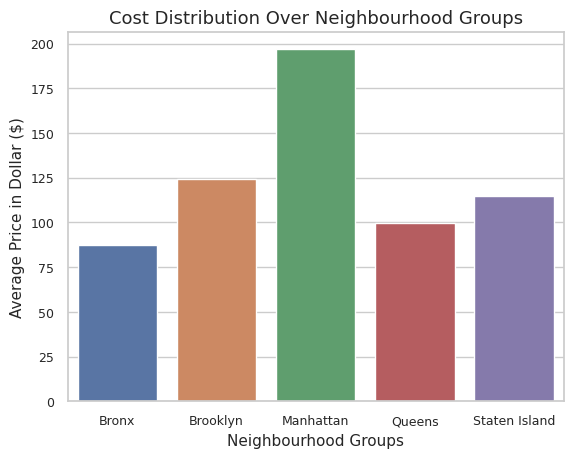

In [ ]:
ax = sns.barplot(x = 'neighbourhood_group', y = 'average_price', data = cost_prop_data)
axis_formatter('Neighbourhood Groups', 'Average Price in Dollar ($)', 'Cost Distribution Over Neighbourhood Groups');

**Inference:** The plot demonstrates how cost is distributed among the five neighbourhood groups, regardless of the type of property listings. The *x*-axis represents the neighbourhood groups, while the *y*-axis represents the average price in dollars. It can be observed that, property listings in Manhattan are significantly more expensive than the rest of the locations with an average cost of nearly 200 dollars. Brooklyn follows with roughly 125 dollars. Queens and Staten Island with about 100 dollars, and 115 dollars respectively. Finally, properties in Bronx are relatively cheaper than the rest, averaging approximately 90 dollars.

### Question 7:  What insight can be drawn regarding the distribution of prices in the given data?

In [ ]:
dsf = df[df['price'] < 2000]['price']

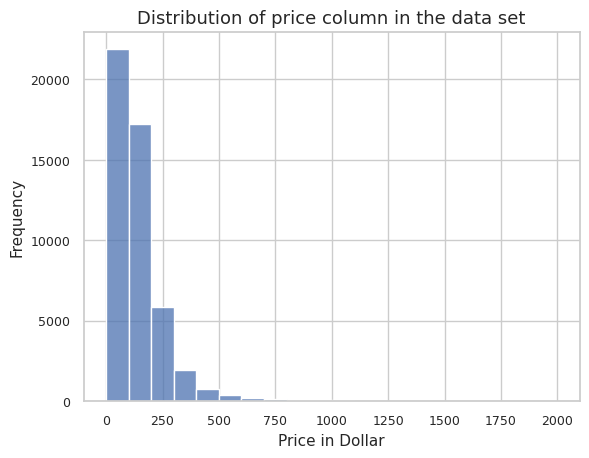

In [ ]:
ax = sns.histplot(data = dsf, bins = 20)
axis_formatter('Price in Dollar', 'Frequency','Distribution of price column in the data set');

**Inference:** From the histogram of the price column in the dataframe, it is evident that the majority of items fall within the lower price range of 0 to 250, as indicated by the higher frequency in this interval. This suggests that a significant proportion of the dataset comprises relatively affordable items. Additionally, there is a noticeable frequency in the 250 to 500 price range, indicating the presence of items with slightly higher prices.

### Question 8: How is the minimum-night-stay distributed over property listings?
Create a histogram for minimum-night-stay

,room_type,average_minimum_nights
0,Entire home/apt,8.506907
1,Private room,5.377900
2,Shared room,6.475000


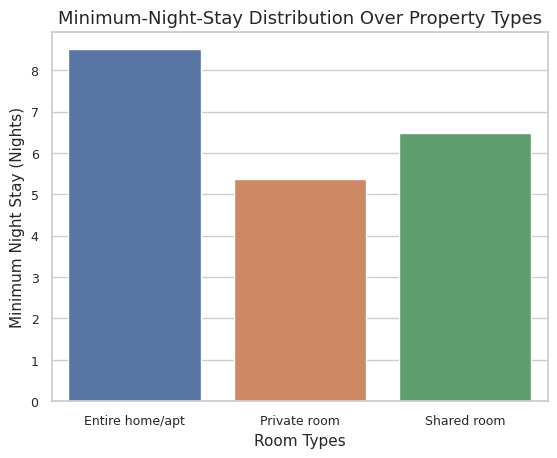

In [ ]:
data = df.groupby('room_type')['minimum_nights'].mean().reset_index(name = 'average_minimum_nights')
ax = sns.barplot(x = 'room_type', y = 'average_minimum_nights', data = data, errorbar = None)
axis_formatter('Room Types', 'Minimum Night Stay (Nights)', 'Minimum-Night-Stay Distribution Over Property Types');
data

**Inference:** The box plot illustrates how minimum-night-stays proposed by hosts are distributed over the different types of properties. the *x*-axis represents the room types, where the *y*-axis represents the average number of stay-in nights allowed by hosts. It can be observed that hosts allow more nights for Entire home/apt type of properties with an average of around 9 nights. Shared rooms follow with slightly over 6 nights and finally private rooms are allowed to be booked for average of a bit over 5 nights.

### Question 9: How does minimum-night-stay affect customer preference?

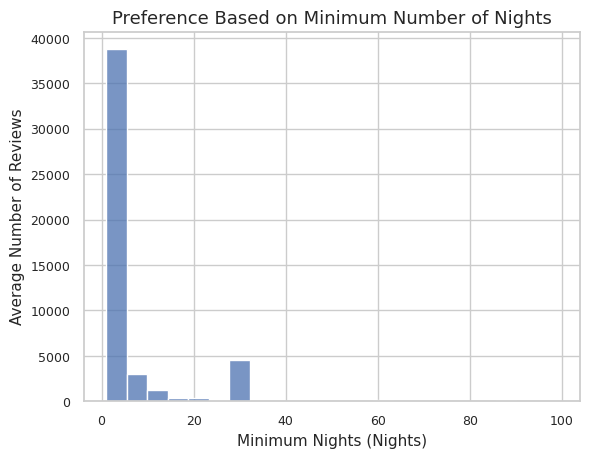

In [ ]:
dsf = df[df['minimum_nights'] < 100]['minimum_nights']
ax = sns.histplot(data = dsf, bins = 22)
axis_formatter('Minimum Nights (Nights)', 'Average Number of Reviews', 'Preference Based on Minimum Number of Nights');

**Inference:** In the observed data, a clear preference among customers for properties with fewer nights set by hosts (owners) is evident. The trend suggests that customers tend to favor accommodations where hosts impose fewer restrictions on the minimum number of nights for booking.